In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from bs4 import SoupStrainer
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import shapely
import json

%matplotlib inline

In [82]:
chicaesar = pd.read_csv('../data/chicaesar.csv')
chigrocery = pd.read_csv('../data/chigrocery.csv')
phl_caeasar = pd.read_csv('../data/phl_caesar.csv')
phl_grocery = pd.read_csv('../data/PhillyNeighborhoodFoodRetail.csv')

In [3]:
chigrocery.head()

,Unnamed: 0,Store Name,Address,Zip,New status,Last updated,Location
0,0,Cermak Produce,4000 West Diversey Ave,60647,OPEN,06/04/2020 03:00:00 PM,NaN
1,1,Jewel - Osco,2520 N Narragansett Ave,60639,OPEN,06/03/2020 05:00:00 PM,POINT (-87.785559 41.926236)
2,2,Mariano's Fresh Market,40 S Halsted St,60661,OPEN,NaN,POINT (-87.647384 41.880557)
3,3,Mariano's Fresh Market,3145 South Ashland Ave,60608,OPEN,06/05/2020 01:21:00 PM,POINT (-87.66563800000002 41.836512)
4,4,Aldi,7800 S South Chicago Ave,60619,OPEN,06/05/2020 01:21:00 PM,POINT (-87.587472 41.752778)


In [4]:
chigrocery.shape

(263, 7)

need long and lat values

In [5]:
chigrocery = chigrocery.dropna(subset = ['Location'], how = "any")

In [6]:
len(chigrocery['Location'])

261

only lost 2 stores, i think i will be ok

In [7]:
chigrocery['Location'] = chigrocery['Location'].str.replace("POINT ()","") 

In [8]:
chigrocery.head()

,Unnamed: 0,Store Name,Address,Zip,New status,Last updated,Location
1,1,Jewel - Osco,2520 N Narragansett Ave,60639,OPEN,06/03/2020 05:00:00 PM,(-87.785559 41.926236)
2,2,Mariano's Fresh Market,40 S Halsted St,60661,OPEN,NaN,(-87.647384 41.880557)
3,3,Mariano's Fresh Market,3145 South Ashland Ave,60608,OPEN,06/05/2020 01:21:00 PM,(-87.66563800000002 41.836512)
4,4,Aldi,7800 S South Chicago Ave,60619,OPEN,06/05/2020 01:21:00 PM,(-87.587472 41.752778)
5,5,Food 4 Less,7030 S Ashland Ave,60636,OPEN,06/05/2020 01:21:00 PM,(-87.663901 41.765174)


In [9]:
chigrocery['Location'] = chigrocery['Location'].str.replace("(","") 
chigrocery['Location'] = chigrocery['Location'].str.replace(")","") 

In [10]:
chigrocery.head()

,Unnamed: 0,Store Name,Address,Zip,New status,Last updated,Location
1,1,Jewel - Osco,2520 N Narragansett Ave,60639,OPEN,06/03/2020 05:00:00 PM,-87.785559 41.926236
2,2,Mariano's Fresh Market,40 S Halsted St,60661,OPEN,NaN,-87.647384 41.880557
3,3,Mariano's Fresh Market,3145 South Ashland Ave,60608,OPEN,06/05/2020 01:21:00 PM,-87.66563800000002 41.836512
4,4,Aldi,7800 S South Chicago Ave,60619,OPEN,06/05/2020 01:21:00 PM,-87.587472 41.752778
5,5,Food 4 Less,7030 S Ashland Ave,60636,OPEN,06/05/2020 01:21:00 PM,-87.663901 41.765174


In [11]:
chigrocery['Location'] = chigrocery['Location'].astype('str')

In [12]:
lat = []
lon = []

for row in chigrocery['Location']:
    lat.append(row.split(' ')[1])
    lon.append(row.split(' ')[0])

chigrocery['latitude'] = lat
chigrocery['longitude'] = lon

In [13]:
chigrocery.head()

,Unnamed: 0,Store Name,Address,Zip,New status,Last updated,Location,latitude,longitude
1,1,Jewel - Osco,2520 N Narragansett Ave,60639,OPEN,06/03/2020 05:00:00 PM,-87.785559 41.926236,41.926236,-87.785559
2,2,Mariano's Fresh Market,40 S Halsted St,60661,OPEN,NaN,-87.647384 41.880557,41.880557,-87.647384
3,3,Mariano's Fresh Market,3145 South Ashland Ave,60608,OPEN,06/05/2020 01:21:00 PM,-87.66563800000002 41.836512,41.836512,-87.66563800000002
4,4,Aldi,7800 S South Chicago Ave,60619,OPEN,06/05/2020 01:21:00 PM,-87.587472 41.752778,41.752778,-87.587472
5,5,Food 4 Less,7030 S Ashland Ave,60636,OPEN,06/05/2020 01:21:00 PM,-87.663901 41.765174,41.765174,-87.663901


In [14]:
zip_dist = chigrocery['Zip'].value_counts()

<AxesSubplot:title={'center':'Grocery Stores by Zip Code'}, xlabel='Zip Code', ylabel='Number of Stores'>

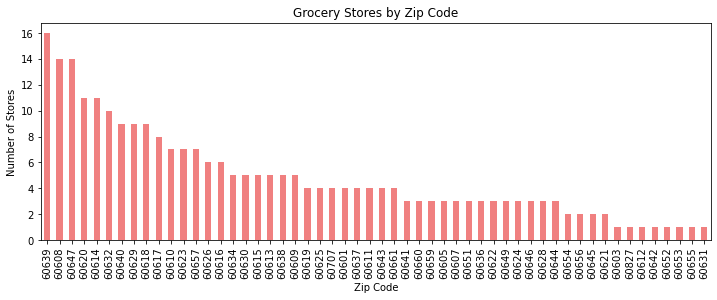

In [15]:
zip_dist.plot(kind='bar', 
              color='lightcoral', 
              figsize=(12,4),
              ylabel='Number of Stores',
              xlabel='Zip Code',
              title = 'Grocery Stores by Zip Code'
             )


In [16]:
zip_dist.head()

60639    16
60608    14
60647    14
60620    11
60614    11
Name: Zip, dtype: int64

In [17]:
d = {'Zip Code': [60639, 60647,60608,60620,60614],
     'Number of Grocery Stores': [16, 15,14,11,11]}
top5_chi_formerging = pd.DataFrame(data=d)
top5_chi_formerging

,Zip Code,Number of Grocery Stores
0,60639,16
1,60647,15
2,60608,14
3,60620,11
4,60614,11


In [85]:
less_affluent = chicagoincome[-6:-1]
less_affluent

,Unnamed: 0,#,Zip Code,Location,City,Population,Average Household Income,National Rank,latitude,longitude,geometry
49,49,50,60602,"41.883067, -87.629187","Chicago, Illinois",70,23750,"#28,954",41.883067,-87.629187,POINT (-87.629187 41.883067)
50,50,51,60637,"41.780673, -87.603500","Chicago, Illinois",57090,23228,"#29,245",41.780673,-87.603500,POINT (-87.6035 41.780673)
51,51,52,60624,"41.880048, -87.722352","Chicago, Illinois",45647,22426,"#29,603",41.880048,-87.722352,POINT (-87.722352 41.880048)
52,52,53,60621,"41.776404, -87.640058","Chicago, Illinois",47514,19718,"#30,613",41.776404,-87.640058,POINT (-87.640058 41.776404)
53,53,54,60653,"41.819722, -87.611809","Chicago, Illinois",34502,14205,"#31,478",41.819722,-87.611809,POINT (-87.61180899999999 41.819722)


In [87]:
most_affluent = chicagoincome[['Zip Code','Average Household Income']].head()
most_affluent

,Zip Code,Average Household Income
0,60606,100377
1,60601,77374
2,60611,69889
3,60614,68324
4,60603,61815


In [90]:
dd = {'Most Affluent Zips':[60606,60601,60611,60614,60603],'Least Affluent Zips':[60602,60637,60624,60621,60653],
     'Average Income (Most Affluent)':[100377,77374,69889,68324,61815],
     'Average Income (Least Affluent)':[23750,23228,22426,19718,14205]}
most_least_affluent =  pd.DataFrame(data=dd)
most_least_affluent

,Most Affluent Zips,Least Affluent Zips,Average Income (Most Affluent),Average Income (Least Affluent)
0,60606,60602,100377,23750
1,60601,60637,77374,23228
2,60611,60624,69889,22426
3,60614,60621,68324,19718
4,60603,60653,61815,14205


In [18]:
most_stores_zip = np.array([60639,60647,60608,60620,60614])

In [83]:
chicagoincome = pd.read_csv('../data/chicagoincomeCLEAN.csv')

In [84]:
chicagoincome.head()

,Unnamed: 0,#,Zip Code,Location,City,Population,Average Household Income,National Rank,latitude,longitude,geometry
0,0,1,60606,"41.881988, -87.637329","Chicago, Illinois",1682,100377,#259,41.881988,-87.637329,POINT (-87.63732899999999 41.881988)
1,1,2,60601,"41.885805, -87.622911","Chicago, Illinois",5591,77374,#961,41.885805,-87.622911,POINT (-87.622911 41.885805)
2,2,3,60611,"41.893024, -87.618998","Chicago, Illinois",26522,69889,"#1,558",41.893024,-87.618998,POINT (-87.618998 41.893024)
3,3,4,60614,"41.922667, -87.652537","Chicago, Illinois",65474,68324,"#1,712",41.922667,-87.652537,POINT (-87.652537 41.922667)
4,4,5,60603,"41.880614, -87.629311","Chicago, Illinois",378,61815,"#2,591",41.880614,-87.629311,POINT (-87.629311 41.880614)


In [20]:
result_most_stores = chicagoincome[chicagoincome['Zip Code'].isin(most_stores_zip)]
result_most_stores = result_most_stores[['Zip Code','Population',
                                         'Average Household Income','geometry']]
result_most_stores

,Zip Code,Population,Average Household Income,geometry
3,60614,65474,68324,POINT (-87.652537 41.922667)
26,60639,92951,40165,POINT (-87.755793 41.920639)
31,60620,85771,36334,POINT (-87.653749 41.740481)
33,60647,98769,35283,POINT (-87.701899 41.921117)
43,60608,92472,28026,POINT (-87.67232 41.848647)


In [21]:
stores_and_zips_top5 = result_most_stores.merge(top5_chi_formerging)

In [22]:
chicagoincome['Average Household Income'].describe()

count        55.000000
mean      41027.709091
std       16607.080994
min           0.000000
25%       30937.500000
50%       40083.000000
75%       50668.000000
max      100377.000000
Name: Average Household Income, dtype: float64

In [23]:
stores_and_zips_top5.sort_values(by = 'Number of Grocery Stores',
                                 ascending=False, inplace = True)

In [24]:
stores_and_zips_top5

,Zip Code,Population,Average Household Income,geometry,Number of Grocery Stores
1,60639,92951,40165,POINT (-87.755793 41.920639),16
3,60647,98769,35283,POINT (-87.701899 41.921117),15
4,60608,92472,28026,POINT (-87.67232 41.848647),14
0,60614,65474,68324,POINT (-87.652537 41.922667),11
2,60620,85771,36334,POINT (-87.653749 41.740481),11


<AxesSubplot:>

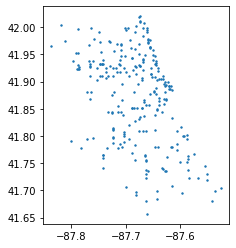

In [25]:
geom = gpd.points_from_xy(chigrocery['longitude'],chigrocery['latitude'])
chigeogrocery = gpd.GeoDataFrame(chigrocery, geometry=geom)

chigeogrocery.plot(markersize=2)

<AxesSubplot:>

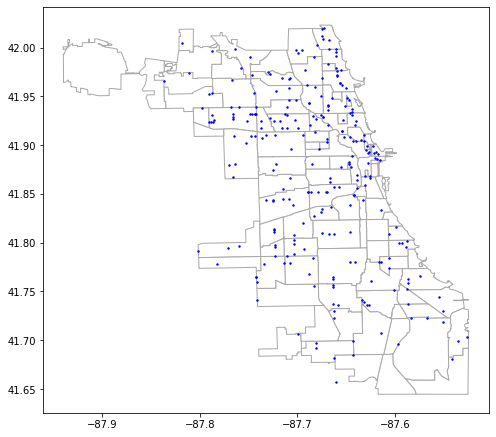

In [26]:
base_chicago = gpd.read_file('../data/chicago.geojson')

base=base_chicago.plot(color='white', edgecolor='darkgray', figsize=(8,8))
chigeogrocery.plot(markersize=2, ax = base, color = 'b')

In [27]:
lat2 = []
lon2 = []

for row in chicagoincome['Location']:
    lat2.append(row.split(',')[0])
    lon2.append(row.split(',')[1])

chicagoincome['latitude'] = lat2
chicagoincome['longitude'] = lon2

In [28]:
chicagoincome.head()

,Unnamed: 0,#,Zip Code,Location,City,Population,Average Household Income,National Rank,latitude,longitude,geometry
0,0,1,60606,"41.881988, -87.637329","Chicago, Illinois",1682,100377,#259,41.881988,-87.637329,POINT (-87.63732899999999 41.881988)
1,1,2,60601,"41.885805, -87.622911","Chicago, Illinois",5591,77374,#961,41.885805,-87.622911,POINT (-87.622911 41.885805)
2,2,3,60611,"41.893024, -87.618998","Chicago, Illinois",26522,69889,"#1,558",41.893024,-87.618998,POINT (-87.618998 41.893024)
3,3,4,60614,"41.922667, -87.652537","Chicago, Illinois",65474,68324,"#1,712",41.922667,-87.652537,POINT (-87.652537 41.922667)
4,4,5,60603,"41.880614, -87.629311","Chicago, Illinois",378,61815,"#2,591",41.880614,-87.629311,POINT (-87.629311 41.880614)


In [29]:
chicaesar = pd.read_csv('../data/chicaesar.csv')

In [91]:
chicaesar

,Unnamed: 0,Street Address,City,Zip,State,full_address
0,21,1406 W 47th St,Chicago,60609,IL,"1406 W 47th St, Chicago, IL, 60609"
1,22,E 95th St,Chicago,60617,IL,"E 95th St, Chicago, IL, 60617"
2,23,2028 E 95th St,Chicago,60617,IL,"2028 E 95th St, Chicago, IL, 60617"
3,24,7902 S Exchange Ave,Chicago,60617,IL,"7902 S Exchange Ave, Chicago, IL, 60617"
4,27,609 E 79th St,Chicago,60619,IL,"609 E 79th St, Chicago, IL, 60619"
5,30,7001 N Clark St,Chicago,60626,IL,"7001 N Clark St, Chicago, IL, 60626"
6,31,6928 S Pulaski Rd,Chicago,60629,IL,"6928 S Pulaski Rd, Chicago, IL, 60629"
7,32,2906 W 63rd St,Chicago,60629,IL,"2906 W 63rd St, Chicago, IL, 60629"
8,34,"4445 N Pulaski Rd, Ste A",Chicago,60630,IL,"4445 N Pulaski Rd, Ste A, Chicago, IL, 60630"
9,37,2833 N Narragansett Ave,Chicago,60634,IL,"2833 N Narragansett Ave, Chicago, IL, 60634"


<AxesSubplot:>

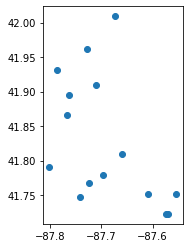

In [30]:
chigeo=gpd.tools.geocode(chicaesar['full_address'],
                         provider='nominatim', user_agent="my-application")

chicaesar_gdf=gpd.GeoDataFrame(pd.concat([chicaesar, chigeo], axis=1))

chicaesar_gdf.plot()

<AxesSubplot:>

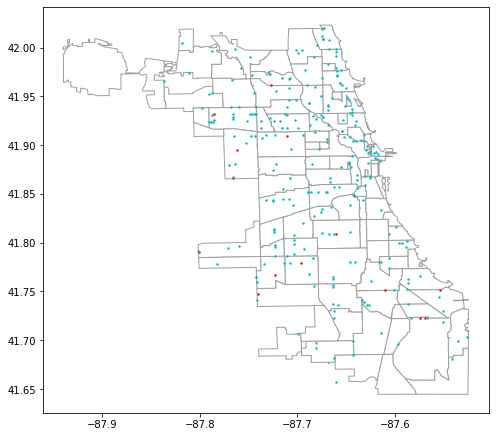

In [31]:
base=base_chicago.plot(color='white', edgecolor='#a0a0a0', figsize=(8,8))
caesarplot = chicaesar_gdf.plot(markersize=2, ax = base, color = 'r')
chigeogrocery.plot(markersize=2, ax = caesarplot, color = 'c')

In [32]:
chicaesar['Zip'].value_counts()

60617    3
60629    2
60638    1
60652    1
60619    1
60634    1
60647    1
60630    1
60644    1
60626    1
60609    1
60651    1
Name: Zip, dtype: int64

In [33]:
d2 = {'Zip Code': [60617, 60629,60638,60652,60619],
     'Number of Little Caesars': [3, 2,1,1,1]}
top5_caesar = pd.DataFrame(data=d2)
top5_caesar


,Zip Code,Number of Little Caesars
0,60617,3
1,60629,2
2,60638,1
3,60652,1
4,60619,1


In [34]:
caesarincome = chicagoincome[chicagoincome['Zip Code'].isin(chicaesar['Zip'])]
caesarincome = caesarincome[['Zip Code','Population','Average Household Income']]
caesarincome

,Zip Code,Population,Average Household Income
11,60652,39126,53120
14,60634,74164,50042
16,60630,54781,47905
18,60638,55788,45173
25,60629,113984,40279
32,60617,96288,35534
33,60647,98769,35283
35,60619,74963,33631
36,60651,77583,32622
39,60626,59251,31318


In [35]:
store_dist = chigrocery['Store Name'].value_counts()
stores_of_interest = store_dist.head(10).index

row_filter = chigrocery['Store Name'].isin(stores_of_interest)

key_stores_gdf = chigrocery[row_filter]
key_stores_gdf = gpd.GeoDataFrame(key_stores_gdf)

key_stores_gdf.shape

(153, 10)

In [36]:
lilmoney = ['Aldi','Cermak Produce','Walmart','Save A Lot','Food 4 Less',
            'Walmart Neighborhood Market']
lilmoney_filter = chigrocery['Store Name'].isin(lilmoney)

In [37]:
bigmoney = ['Costco','Trader Joes','Whole Foods Market','Jewel - Osco','Target',
           "Pete's Fresh Market","Mariano's Fresh Market"]

bigmoney_filter = chigrocery['Store Name'].isin(bigmoney)

In [38]:
bigmoney_gdf = chigrocery[bigmoney_filter]
bigmoney_gdf = gpd.GeoDataFrame(bigmoney_gdf)

In [39]:
lilmoney_gdf = chigrocery[lilmoney_filter]
lilmoney_gdf = gpd.GeoDataFrame(lilmoney_gdf)

Text(0.5, 1.0, 'Little Caesars Near Grocery Stores in Chicago')

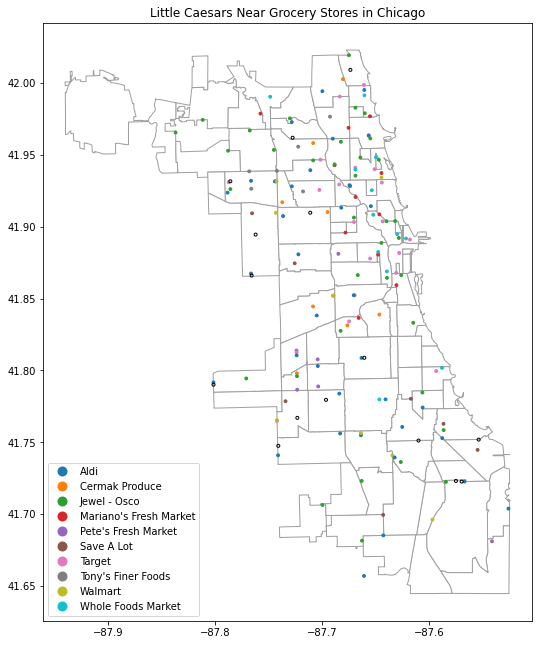

In [40]:
base=base_chicago.plot(color='white', edgecolor='#a0a0a0', figsize=(11,11))
storesplot = key_stores_gdf.plot(markersize=8, ax=base, column='Store Name', legend=True)
caesar_w_stores_plot = chicaesar_gdf.plot(markersize=9,
                                          ax = storesplot,
                                          color = 'none',
                                          edgecolors='k')
plt.title('Little Caesars Near Grocery Stores in Chicago')

Text(0.5, 1.0, 'Little Caesars Near Affordable Grocery Stores in Chicago')

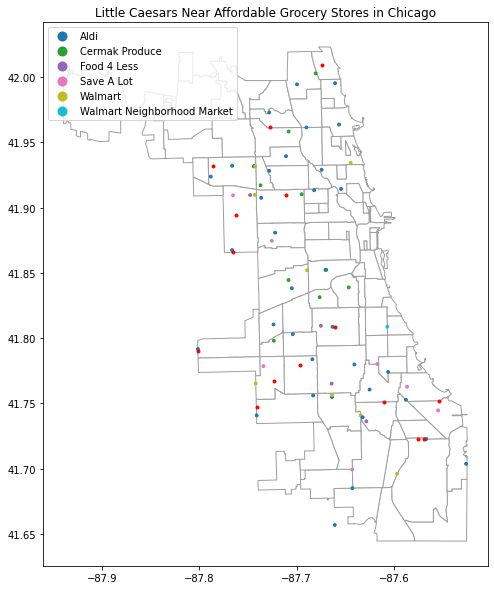

In [41]:
base=base_chicago.plot(color='white', edgecolor='#a0a0a0', figsize=(10,10))
lilmoneyplot = lilmoney_gdf.plot(markersize=8, ax=base, column='Store Name', legend=True)
caesar_w_lilmoney_plot = chicaesar_gdf.plot(markersize=9,
                                          ax = lilmoneyplot,
                                          color = 'r',
                                          edgecolors='r')

plt.title('Little Caesars Near Affordable Grocery Stores in Chicago')

Text(0.5, 1.0, 'Little Caesars Near Mid-Tier/High End Grocery Stores in Chicago')

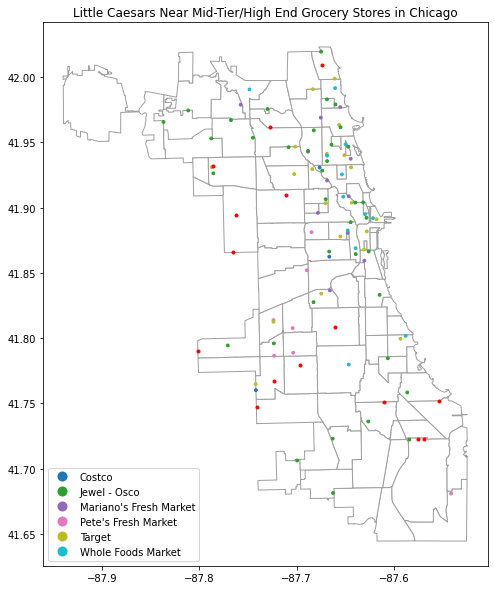

In [42]:
base=base_chicago.plot(color='white', edgecolor='#a0a0a0', figsize=(10,10))
bigmoneyplot = bigmoney_gdf.plot(markersize=8, ax=base, column='Store Name', legend=True)
caesar_w_bigmoney_plot = chicaesar_gdf.plot(markersize=9,
                                          ax = bigmoneyplot,
                                          color = 'r',
                                          edgecolors='r')
plt.title('Little Caesars Near Mid-Tier/High End Grocery Stores in Chicago')

In [43]:
cops = pd.read_csv('../data/chipolice.csv')

cops['ZIP'] = cops['ZIP'].astype(str)

cops['full_address']=cops[['ADDRESS','CITY',
                                     'STATE', 'ZIP']].apply(lambda r: ', '.join(r.values),
                                                            axis=1)

In [44]:
copsgeoloc=gpd.tools.geocode(cops['full_address'], 
                         provider='nominatim', user_agent="my-application")

In [45]:
cops_gdf=gpd.GeoDataFrame(pd.concat([cops, copsgeoloc], axis=1))

Text(0.5, 1.0, 'Little Caesars Near Police Stations in Chicago')

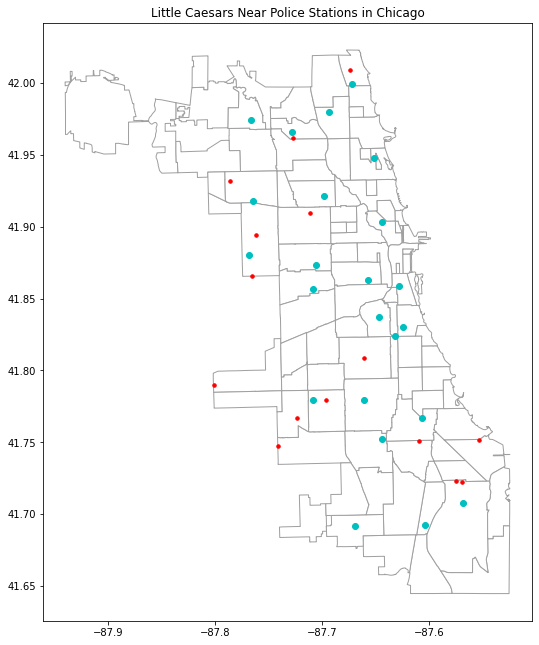

In [46]:
base=base_chicago.plot(color='white', edgecolor='#a0a0a0', figsize=(11,11))
caesarsplot = chicaesar_gdf.plot(markersize=12, ax=base, color = 'r')
cops_gdf.plot(ax=caesarsplot, color = 'c')
plt.title("Little Caesars Near Police Stations in Chicago")

## PHL

In [47]:
phl_caeasar['full_address']= phl_caeasar[['Street Address','City',
                                     'State', 'Zip']].apply(lambda r: ', '.join(r.values),
                                                            axis=1)

In [48]:
phlgeoloc=gpd.tools.geocode(phl_caeasar['full_address'],
                         provider='nominatim', user_agent="my-application")

In [49]:
phlcaesar_gdf=gpd.GeoDataFrame(pd.concat([phl_caeasar, phlgeoloc], axis=1))

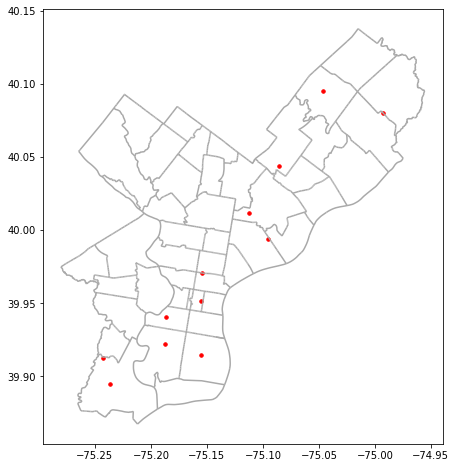

In [50]:
base_phl = gpd.read_file('../data/phillyzipcodes.geojson')

basephl=base_phl.plot(color='darkgray', edgecolor='darkgray', figsize=(8,8))
phlcaesarsplot = phlcaesar_gdf.plot(markersize=12, ax=basephl, color = 'r')

In [51]:
phl_geo = gpd.read_file('../data/NeighborhoodFoodRetail.geojson')

In [52]:
phl_geo.columns

Index(['OBJECTID', 'GEOID10', 'NON_RESIDENTIAL', 'TOTAL_LPSS', 'LPSS_PER1000',
       'TOTAL_HPSS', 'HPSS_PER1000', 'PCT_HPSS', 'HPSS_ACCESS',
       'SUPERMARKET_ACCESS', 'PCT_VEHICLE_AVAILABILITY', 'TOTAL_RESTAURANTS',
       'PCT_POVERTY', 'HIGH_POVERTY', 'Shape__Area', 'Shape__Length',
       'geometry'],
      dtype='object')

Text(0.5, 1.0, 'Little Caesars near Low Produce Grocery Stores in Philadelphia')

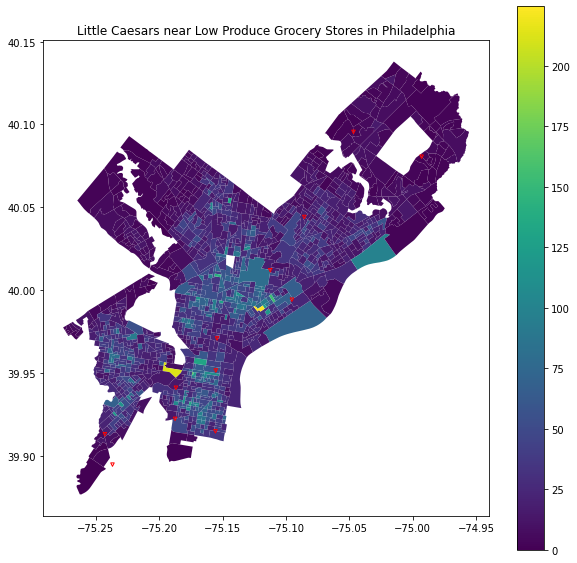

In [53]:
lpss_plot = phl_geo.plot(column='LPSS_PER1000', figsize=(10,10), legend=True)
phlcaesarsplot = phlcaesar_gdf.plot(markersize=12,
                                    ax=lpss_plot,color='none',
                                    edgecolors ='r', marker='v')
plt.title('Little Caesars near Low Produce Grocery Stores in Philadelphia')

Text(0.5, 1.0, 'Little Caesars near High Produce Grocery Stores in Philadelphia')

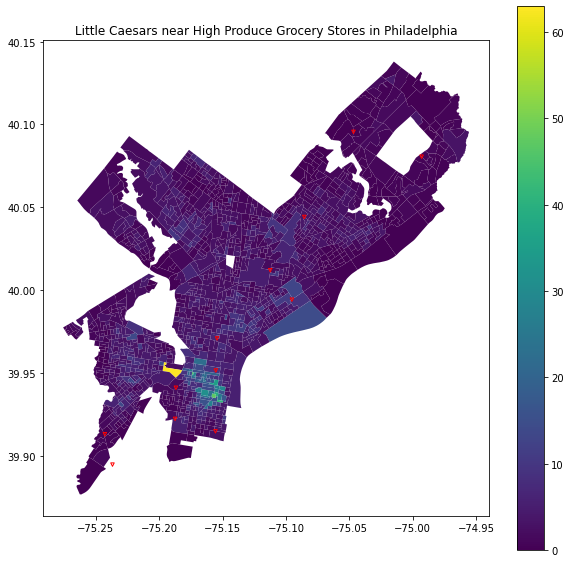

In [54]:
hpss_plot = phl_geo.plot(column='HPSS_PER1000', figsize=(10,10), legend=True)
phlcaesarsplot = phlcaesar_gdf.plot(markersize=12,
                                    ax=hpss_plot,color='none',
                                    edgecolors ='r', marker='v')
plt.title('Little Caesars near High Produce Grocery Stores in Philadelphia')

Text(0.5, 1.0, 'Little Caesars in Areas With High Poverty (2)')

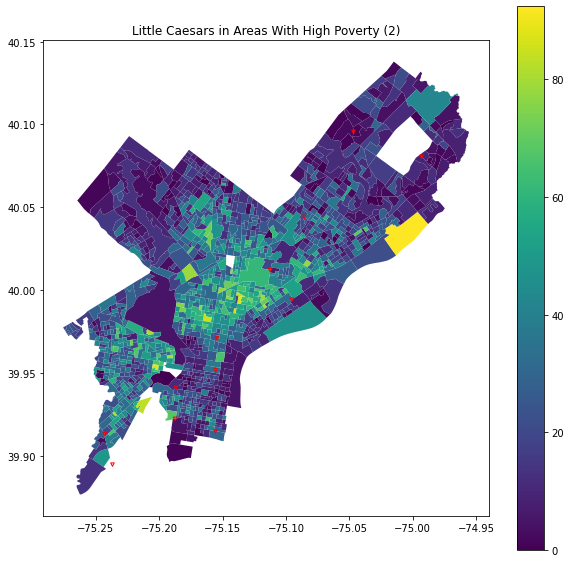

In [55]:
pobreza_plot = phl_geo.plot(column='PCT_POVERTY', figsize=(10,10), legend=True)
phlcaesarsplot = phlcaesar_gdf.plot(markersize=12,
                                    ax=pobreza_plot,color='none',
                                    edgecolors ='r', marker='v')
plt.title('Little Caesars in Areas With High Poverty (2)')

In [56]:
phl_geo.head(2)

,OBJECTID,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,PCT_VEHICLE_AVAILABILITY,TOTAL_RESTAURANTS,PCT_POVERTY,HIGH_POVERTY,Shape__Area,Shape__Length,geometry
0,1,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044,"POLYGON ((-75.19851 39.96945, -75.20372 39.970..."
1,2,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.882812,1736.152373,"POLYGON ((-75.19783 39.96571, -75.19794 39.966..."


In [57]:
phl_grocery_gdf = gpd.GeoDataFrame(phl_grocery)

## LA COUNTY

In [58]:
lac_caesar = pd.read_csv('../data/lac_caesar')
lac_grocery = pd.read_csv('../data/lac_grocery')

In [59]:
lac_caesar = lac_caesar.rename(columns={'FACILITY ADDRESS':'Street Address',
                                       'FACILITY CITY':'City',
                                       'FACILITY STATE':'State',
                                       'FACILITY ZIP':'Zip'})

In [60]:
lac_grocery = lac_grocery.rename(columns={'FACILITY ADDRESS':'Street Address',
                                       'FACILITY CITY':'City',
                                       'FACILITY STATE':'State',
                                       'FACILITY ZIP':'Zip'})

In [61]:
zip_caesar_lac = lac_caesar['Zip'].value_counts()

In [62]:
caesar_lac_zips = np.unique(lac_caesar['Zip'])

In [63]:
lac_income = pd.read_excel('../data/lac_income.xlsx')

In [64]:
lac_caesar

,Unnamed: 0,FACILITY NAME,Street Address,City,State,Zip,PE DESCRIPTION
0,94,LITTLE CAESARS,3476 E WHITTIER BLVD 112,LOS ANGELES,CA,90033,RESTAURANT (0-30) SEATS MODERATE RISK
1,590,LITTLE CAESARS PIZZA,1846 LOMITA BLVD,LOMITA,CA,90717,RESTAURANT (0-30) SEATS MODERATE RISK
2,1310,LITTLE CAESARS PIZZA #5831,5800 SANTA MONICA BLVD,LOS ANGELES,CA,90038,RESTAURANT (0-30) SEATS MODERATE RISK
3,1321,LITTLE CAESARS,1036 E AVENUE J #D-12,LANCASTER,CA,93535,RESTAURANT (0-30) SEATS MODERATE RISK
4,1901,LITTLE CAESARS #5726,10366 MASON AVE,CHATSWORTH,CA,91311,RESTAURANT (0-30) SEATS MODERATE RISK
...,...,...,...,...,...,...,...
112,190011,LITTLE CAESARS #5781,533 S AZUSA WAY,LA PUENTE,CA,91744,RESTAURANT (0-30) SEATS MODERATE RISK
113,246341,LITTLE CAESARS #5743,8229 WOODMAN AVE,PANORAMA CITY,CA,91402,RESTAURANT (0-30) SEATS MODERATE RISK
114,264627,LITTLE CAESARS #5788,4960 HUNTINGTON DR # B,LOS ANGELES,CA,90032,RESTAURANT (0-30) SEATS MODERATE RISK
115,268317,LITTLE CAESARS #5784,9209 TELEGRAPH RD,PICO RIVERA,CA,90660,RESTAURANT (0-30) SEATS MODERATE RISK


In [65]:
lac_caesar_pivot = lac_caesar.pivot_table(index ='Zip',
                       aggfunc='count').reset_index()
lac_caesar_pivot

,Zip,City,FACILITY NAME,PE DESCRIPTION,State,Street Address,Unnamed: 0
0,90001,1,1,1,1,1,1
1,90002,1,1,1,1,1,1
2,90003,3,3,3,3,3,3
3,90004,1,1,1,1,1,1
4,90011,1,1,1,1,1,1
...,...,...,...,...,...,...,...
91,93535,1,1,1,1,1,1
92,93536,1,1,1,1,1,1
93,93550,1,1,1,1,1,1
94,93551,2,2,2,2,2,2


In [66]:
lac_caesar_pivot.columns

Index(['Zip', 'City', 'FACILITY NAME', 'PE DESCRIPTION', 'State',
       'Street Address', 'Unnamed: 0'],
      dtype='object')

In [67]:
lac_caesar_tomerge = pd.DataFrame()
lac_caesar_tomerge['Zip Code'] = lac_caesar_pivot['Zip']
lac_caesar_tomerge['Number of Little Caesars'] = lac_caesar_pivot['Street Address']

In [68]:
lac_income.head()

,Zip Code,Community,Estimated Median Income
0,90001,"Los Angeles (South Los Angeles), Florence-Graham",38521
1,90002,"Los Angeles (Southeast Los Angeles, Watts)",35410
2,90003,"Los Angeles (South Los Angeles, Southeast Los ...",37226
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi...",48754
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire...",35149


In [69]:
caesar_lac_income_df = lac_income[lac_income['Zip Code'].isin(caesar_lac_zips)].sort_values(by='Estimated Median Income',
                                                                    ascending = False)

In [70]:
caesar_lac_income_df.head(15)

,Zip Code,Community,Estimated Median Income
203,91350,"Bouquet Canyon, Green Valley, Mint Canyon, San...",112664
183,91214,"Glendale, La Crescenta, Montrose",100625
131,90713,Lakewood,100132
238,91711,Claremont,97593
110,90505,Torrance,96827
207,91355,Santa Clarita (Valencia),92707
279,93551,"City Ranch, Leona Valley, Palmdale",92500
251,91750,La Verne,86352
190,91311,Los Angeles (Chatsworth),86156
260,91773,San Dimas,84355


In [74]:
caesar_lac_income_df = caesar_lac_income_df.merge(lac_caesar_tomerge).sort_values(by='Number of Little Caesars',
                                                          ascending = False)

In [75]:
caesar_lac_income_df.columns

Index(['Zip Code', 'Community', 'Estimated Median Income',
       'Number of Little Caesars'],
      dtype='object')

<AxesSubplot:xlabel='Number of Little Caesars', ylabel='Estimated Median Income'>

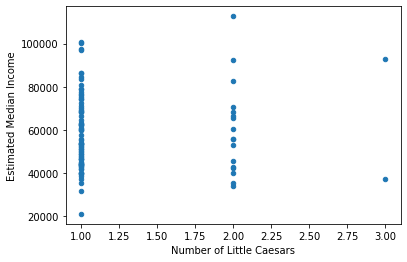

In [77]:
caesar_lac_income_df.plot.scatter('Number of Little Caesars','Estimated Median Income')

In [73]:
1+1

2

<AxesSubplot:>

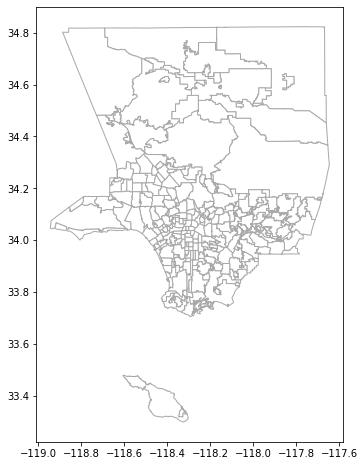

In [72]:
base_lac = gpd.read_file('../data/la-county-neighborhoods-current.geojson')

baselac=base_lac.plot(color='white', edgecolor='darkgray', figsize=(8,8))
baselac